## **Missing Values**

* Eksik veriler, belirli gözlemler için değerlerin olmaması anlamına gelir (NA-NAN) ve çoğu veri kaynağında kaçınılmaz bir sorundur. Scikit-learn, girdi olarak eksik değerleri desteklemez, bu nedenle eksik veriler içeren gözlemleri kaldırmamız veya izin verilen değerlere dönüştürmemiz gerekir.

#### **Eksik Değer Problemi Nasıl Çözülür ?**

* Eksik verileri, eksik değerlerin istatistiksel tahminleriyle değiştirme işlemine atama denir. Herhangi bir atama tekniğinin amacı, makine öğrenimi modellerini eğitmek için kullanılabilecek eksiksiz bir veri kümesi üretmektir. Verilerimize uygulayabileceğimiz birden fazla atama tekniği vardır. 

* Kullanacağımız atama tekniğinin seçimi, verilerin rastgele oluşup olmadığına, eksik değerlerin sayısına ve kullanmayı düşündüğümüz makine öğrenimi modeline bağlı olacaktır.

**Özetle**,

1. Silme
2. Değer Atama (mean, mode, median etc..)
3. Tahmine Dayalı Yöntemler

Eksik veri ile çalışırken göz önünde bulundurulması gereken önemli konulardan birisi: 

* **Eksik Verinin Rassallığıdır.** Başka bir ifade ile eksikliğin rastgele ortaya çıkıp çıkmadığının bilinmesi gerektiğidir.


$	\hookrightarrow$ Eksik değere sahip gözlemlerin veri setinden direkt çıkarılması ve rassallığın incelenmemesi, yapılacak istatistiksel çıkarımların ve modelleme çalışmalarının güvenirliliğini düşürecektir (Alpar, 2011).


* Eksik gözlemlerin veri setinden direkt çıkarılabilmesi için veri setindeki eksikliğin bazı durumlarda kısmen bazı durumlarda tamamen rastlantısal olarak oluşmuş olması gerekmektedir. 

$	\hookrightarrow$ Eğer eksiklikler değişkenler ile ilişkili olarak ortaya çıkan yapısal problemler ile meydana gelmiş ise bu durumda yapılacak silme işlemleri ciddi yanlılıkları sebep olabilecektir (Tabachnick and Fidell, 1996). 


* Eğer eksiklik rastgele ortaya çıkmadıysa bu yapısallığın nereden kaynaklandığını bulup çözmek gerekir.

#### **Kullanılacak Kütüphaneler**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)

#### **Veri Setinin Yüklenmesi**

In [ ]:
def load_application_train():
    data = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_9 (24.11.22-30.11.22)/feature_engineering/datasets/titanic.csv")
    return data

df = load_application_train()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


### **Eksik Değerlerin Yakalanması**

In [ ]:
# eksik gözlem var mı yok mu ?
df.isnull().values.any()

True

In [ ]:
# değişkenlerdeki eksik değer sayısı
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#değişkenlerdeki tam değer sayısı
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [ ]:
# veri setindeki toplam eksik değer sayısı
df.isnull().sum().sum()

866

In [ ]:
# en az bir tane eksik degere sahip olan gözlem birimleri
df[df.isnull().any(axis=1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S


In [ ]:
# tam olan gözlem birimleri
df[df.notnull().all(axis=1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000,1,1,PP 9549,16.700,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000,0,0,113783,26.550,C103,S


In [ ]:
# azalan şekilde sıralamak
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

Cabin         77.104
Age           19.865
Embarked       0.224
PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
dtype: float64

In [ ]:
na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]

#gözlem eksiklik frekansı
#eksikliğin yüzdelikleri
#eklikliğe sahip olan değişkenlerin seçilmesi

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns
missing_values_table(df)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


In [ ]:
#ikinci yolu
missing_values_table(df, True)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


['Age', 'Cabin', 'Embarked']

#### **Eksik Değer Problemini Çözme**

<u>**Çözüm 1: Hızlıca silmek**</u>

Bu yöntem kullanıldığında gözlem sayısı azalacaktır.

In [ ]:
df.dropna().shape

(183, 12)

<u>**Çözüm 2: Basit Atama Yöntemleri ile Doldurmak**</u>

In [ ]:
df["Age"].fillna(df["Age"].mean()).isnull().sum() #ortalama ile doldurma

0

In [ ]:
df["Age"].fillna(df["Age"].median()).isnull().sum() #medyan ile doldurma

0

In [ ]:
df["Age"].fillna(0).isnull().sum() #0 gibi sabit bir değerle doldurma

0

### **Aşağıdaki kodda birden fazla değişken için doldurma işlemi yapmak istiyoruz fakat satırlarda kategorik değişken var. Dolayısıyla hata verecek !**

In [ ]:
# df.apply(lambda x: x.fillna(x.mean()), axis=0)

In [ ]:
df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [ ]:
df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
# bütün sayısal değişkenleri ortalama ile doldurmak için genel kod.
dff = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)

dff.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
# kategorik değişkenler için en mantıklı yöntem mode almaktır.
#mode()[0] modun string value suna erişmek için kullanılır. Sıfırıncı indexi getir.
df["Embarked"].fillna(df["Embarked"].mode()[0]).isnull().sum()

0

In [ ]:
# daha sonra analiz etmek istersen "missing" gibi bir değerlede doldurabilirsin.
df["Embarked"].fillna("missing").head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [ ]:
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<u>**Çözüm 3 : Kategorik Değişken Kırılımında Değer Atama**

In [ ]:
df.groupby("Sex")["Age"].mean()

Sex
female   27.916
male     30.727
Name: Age, dtype: float64

In [ ]:
df["Age"].mean() #bütün yaş ortalamalarına göre tek bir ortalama atamak yerine cinsiyet kırılımında değer atanabilir.

29.69911764705882

* **Yaş değişkenindeki kadınların yaş ortalamalarını ayrı, erkeklerin ortalamalarını ayrı, alıp değer atamak isteyebilirsin.**

In [ ]:
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()

0

In [ ]:
df.groupby("Sex")["Age"].mean()["female"] #kadınların yaş ortalaması

27.915708812260537

In [ ]:
df.loc[(df["Age"].isnull()) & (df["Sex"]=="female"), "Age"] = df.groupby("Sex")["Age"].mean()["female"]

In [ ]:
df.loc[(df["Age"].isnull()) & (df["Sex"]=="male"), "Age"] = df.groupby("Sex")["Age"].mean()["male"]

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<u>**Çözüm 4:** **Tahmine Dayalı Atama ile Doldurma</u>**

Makine öğrenmesi yöntemi ile eksikliğe sahip değeri **bağımlı değişken** diğer değişkenleri **bağımsız değişken** gibi kabul edip bir modelleme işlemi gerçekleştireceğiz. Modelleme işlemine göre eksik değere sahip olan noktaları tahmin etmeye çalışacağız.

**1.** Kategorik değişkenleri One Hot Encoder uygulamak gerekiyor.

**2.** KNN uzaklık temelli bir algoritma olduğu için değişkenleri standartlaştırmak gerekiyor. 

In [ ]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def load_application_train():
    data = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_9 (24.11.22-30.11.22)/feature_engineering/datasets/titanic.csv")
    return data

df = load_application_train()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
dff = load_application_train()
dff.head()

def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, num_but_cat, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if col not in "PassengerId"]

for col in num_cols:
    print(col, check_outlier(df, col))

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
Age True
Fare True


In [ ]:
# iki sınıfa sahip kategorik değişkenlerin ilk sınıfını atacak ikinci sınıfını tutacak
# get_dummies kategorik değişkenler yakalayıp 0-1 dönüşüm işlemi yapar.

dff = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,22.000,7.250,1,0,1
1,1,1,1,0,38.000,71.283,0,0,0
2,1,3,0,0,26.000,7.925,0,0,1
3,1,1,1,0,35.000,53.100,0,0,1
4,0,3,0,0,35.000,8.050,1,0,1


In [ ]:
# değişkenlerin standartlaştırılması
scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,1.000,0.125,0.000,0.271,0.014,1.000,0.000,1.000
1,1.000,0.000,0.125,0.000,0.472,0.139,0.000,0.000,0.000
2,1.000,1.000,0.000,0.000,0.321,0.015,0.000,0.000,1.000
3,1.000,0.000,0.125,0.000,0.435,0.104,0.000,0.000,1.000
4,0.000,1.000,0.000,0.000,0.435,0.016,1.000,0.000,1.000


In [ ]:
# knn'in uygulanması. (uzaklık temelli bir yöntem olup, bana arkadaşını söyle sana kim olduğunu söyleyeyim der).
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,1.000,0.125,0.000,0.271,0.014,1.000,0.000,1.000
1,1.000,0.000,0.125,0.000,0.472,0.139,0.000,0.000,0.000
2,1.000,1.000,0.000,0.000,0.321,0.015,0.000,0.000,1.000
3,1.000,0.000,0.125,0.000,0.435,0.104,0.000,0.000,1.000
4,0.000,1.000,0.000,0.000,0.435,0.016,1.000,0.000,1.000


In [ ]:
# standartlaştırma işlemini geri alıyorum. Çünkü hala 0-1 ben gerçek değerlere dönmeliyim.
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)

In [ ]:
# age değişkeninin eski hali ne idi ben ne atadım bunu görmek istiyorum ki kıyaslayabileyim, takip edebileyim.
df["age_imputed_knn"] = dff[["Age"]]

In [ ]:
df.loc[df["Age"].isnull(), ["Age", "age_imputed_knn"]].head()

,Age,age_imputed_knn
5,NaN,47.800
17,NaN,37.600
19,NaN,12.200
26,NaN,32.800
28,NaN,17.600


In [ ]:
df.loc[df["Age"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_imputed_knn
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q,47.800
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.000,NaN,S,37.600
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C,12.200
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,NaN,C,32.800
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.879,NaN,Q,17.600


In [ ]:
# Recap

df = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_9 (24.11.22-30.11.22)/feature_engineering/datasets/titanic.csv")
# missing table
missing_values_table(df)
# sayısal değişkenleri direk median ile oldurma
df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0).isnull().sum()
# kategorik değişkenleri mode ile doldurma
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()
# kategorik değişken kırılımında sayısal değişkenleri doldurmak
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()
# Tahmine Dayalı Atama ile Doldurma

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


0


#### **Gelişmiş Analizler**

##### **Eksik Veri Yapısının İncelenmesi**

Eksik değerler ile bağımlı değişken arasındaki durumu inceleme fonksiyonu paylaşılacak.


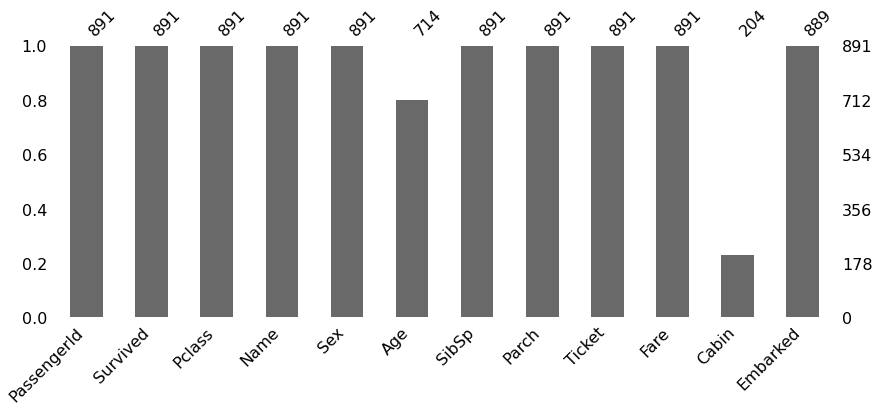

In [ ]:
msno.bar(df,  figsize=(14,5))
plt.show()

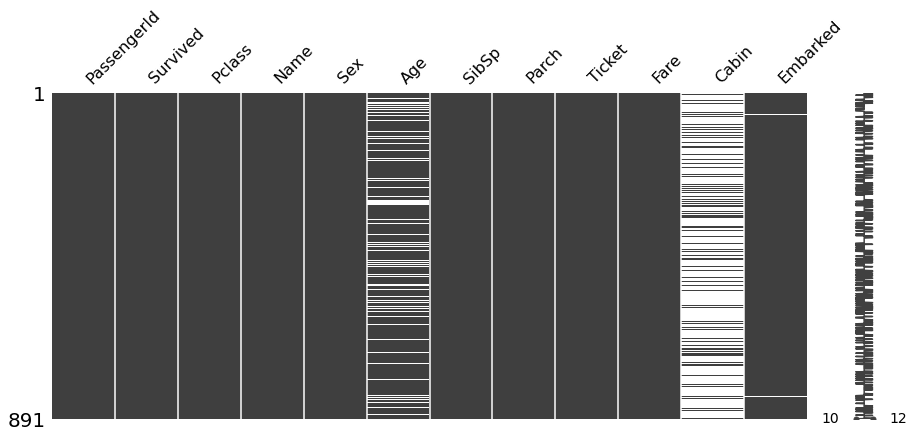

In [ ]:
msno.matrix(df, figsize=(15,6))

plt.show()

* Asıl istenen eksik değerlerin rassallığı idi. Acaba eksiklikler birlikte mi çıktı, yoksa başka bir değişkene bağlı olarak mı çıktı ? 

* Pozitif yönlü bir korelasyon varsa o zaman eksikliklerin birlikte ortaya çıktığı düşünülür. Yani birinde eksiklik varken/yokken diğerinde de eksiklik vardır/yoktur. 

* Eğer negatif yönlü bir korelasyon varsa birinde eksiklik varken/yokken diğerinde yoktur/vardır. Yani ters yönlüdür.


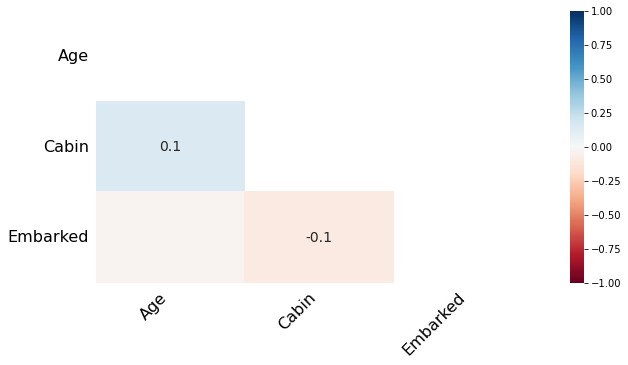

In [ ]:
msno.heatmap(df,  figsize=(10,5))
plt.show()


#### **Eksik Değerlerin Bağımlı Değişken ile İlişkisinin İncelenmesi**


In [ ]:
missing_values_table(df, True)
na_cols = missing_values_table(df, True)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220
          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


In [ ]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")


missing_vs_target(df, "Survived", na_cols)

             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                       0.382    889
1                       1.000      2




#### **Recap**


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_9 (24.11.22-30.11.22)/feature_engineering/datasets/titanic.csv")
na_cols = missing_values_table(df, True)
#### **Sayısal değişkenleri direk median ile oldurma**
df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0).isnull().sum()
#### **Kategorik değişkenleri mode ile doldurma**
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()
#### **Kategorik değişken kırılımında sayısal değişkenleri doldurmak**
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()
#### **Tahmine Dayalı Atama ile Doldurma**
missing_vs_target(df, "Survived", na_cols)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220
             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                       0.382    889
1                       1.000      2




In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/DSMLBC10/week_9 (24.11.22-30.11.22)/feature_engineering/datasets/titanic.csv")
na_cols = missing_values_table(df, True)
# sayısal değişkenleri direk median ile oldurma
df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0).isnull().sum()
# kategorik değişkenleri mode ile doldurma
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()
# kategorik değişken kırılımında sayısal değişkenleri doldurmak
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()
# Tahmine Dayalı Atama ile Doldurma
missing_vs_target(df, "Survived", na_cols)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220
             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                       0.382    889
1                       1.000      2




#### **Eksik Değerlerin Bağımlı Değişken ile İlişkisinin İncelenmesi**

In [ ]:
missing_values_table(df, True)
na_cols = missing_values_table(df, True)


def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")


missing_vs_target(df, "Survived", na_cols)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220
          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220
             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                       0.382    889
1                       1.000      2




* Eksik değere sahip olan değişkenlerle ile survived değişkeni arasındaki ilişkiyi verir.

* Amacımız survived'ın (hayatta kalma) hangi değişkenlere bağlı olduğunu bulmak. 

* Cabin_NA_FLAG : kabin numarası olmayanları verir.

* Hayatta kalma oranı 0.30 iken cabin nosu belli olanların hayatta kalması 0.66. Yani kabin no yu dışarıda bıraksaydık bu değerli bilgiyi kaçıracaktık.

* <u>**Sonuç olarak:**</u> Eksik veri deyip geçmemek gerekiyor, veriyi iyi anlamak, değişkenler arası ilişkilerden anlamlı bilgiler çıkarılabiliyorsa çıkarmak çok önemli ! 